In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from reference import get_file_names, get_histplot, get_scatter_marker_size
from scipy import stats
import seaborn as sns

In [2]:
df_ref = pd.read_csv('./vidas_data/cross_ref_cols_tabs.csv')
df_referral = pd.read_csv('./vidas_data/survival_time.csv', parse_dates=['EOH', 'SOH'])

In [3]:
print(get_file_names(['IDEHR', 'EHRType', 'Mobilita'], df_ref))

['wH_DirectTable_VISITA_INF_VIDAS', 'wH_DirectTable_XX_VISITA_INF_VIDAS', 'wH_DirectTable_C_VISITA_INF_VIDAS']


In [4]:
df_ms = pd.read_csv('./vidas_data/wH_DirectTable_VISITA_INF_VIDAS.csv', parse_dates=['TimeStamp_Insert'])
df_ms = df_ms[['IDEHR', 'EHRType', 'TimeStamp_Insert', 'Mobilita']].dropna().rename(columns={'Mobilita': 'mobility'})
df_ma = pd.merge(df_referral, df_ms, on=['IDEHR', 'EHRType']).dropna().sort_values(by=['IDEHR', 'TimeStamp_Insert'], ascending=[True, True]).reset_index(drop=True)

C:\Users\prate\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (18,19,20,21,22,23,24,85,162,163,164,165,166,167,168) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df_ma.mobility.value_counts()

Dipendente#4            33398
Con aiuto#2             17698
Con aiuto e ausili#3    13318
Indipendente#0          12675
N.R.                     4857
Con ausili#1             2733
Name: mobility, dtype: int64

In [6]:
df_ma.loc[df_ma['mobility'] == 'N.R.', 'mobility'] = np.nan
df_ma.loc[df_ma['mobility'] == 'Indipendente#0', 'mobility'] = 10.0
df_ma.loc[df_ma['mobility'] == 'Con ausili#1', 'mobility'] = 7.5
df_ma.loc[df_ma['mobility'] == 'Con aiuto#2', 'mobility'] = 5.0
df_ma.loc[df_ma['mobility'] == 'Con aiuto e ausili#3', 'mobility'] = 2.5
df_ma.loc[df_ma['mobility'] == 'Dipendente#4', 'mobility'] = 0.0

In [7]:
df_ma['mobility'] = pd.to_numeric(df_ma.mobility, errors='coerce')

In [8]:
df_ma

,IDEHR,EOH,EHRType,SOH,survival_time_days,Diagnosis,Diag_Ref,TimeStamp_Insert,mobility
0,1382,2015-10-27 08:25:00,EHR,2015-09-11 17:39:52.193,45.0,Palliative (Non-Malignant),667,2015-10-06 13:08:33.307,0.0
1,1382,2015-10-27 08:25:00,EHR,2015-09-11 17:39:52.193,45.0,Palliative (Non-Malignant),667,2015-10-06 17:51:06.480,0.0
2,1382,2015-10-27 08:25:00,EHR,2015-09-11 17:39:52.193,45.0,Palliative (Non-Malignant),667,2015-10-07 05:20:13.373,0.0
3,1382,2015-10-27 08:25:00,EHR,2015-09-11 17:39:52.193,45.0,Palliative (Non-Malignant),667,2015-10-07 11:19:10.627,5.0
4,1382,2015-10-27 08:25:00,EHR,2015-09-11 17:39:52.193,45.0,Palliative (Non-Malignant),667,2015-10-07 19:28:37.617,5.0
...,...,...,...,...,...,...,...,...,...
84674,26422,2020-02-03 00:00:14,AMB,2020-01-27 17:27:57.523,6.0,Palliative (Non-Malignant),4280,2020-02-01 16:16:42.297,0.0
84675,26426,2020-03-05 07:15:09,AMB,2020-01-28 12:57:03.963,36.0,Pancreas,1579,2020-01-30 13:08:39.447,10.0
84676,26434,2020-02-12 19:30:10,AMB,2020-01-28 16:23:02.117,15.0,Genitourinary,1889,2020-01-31 10:13:54.727,0.0
84677,26446,2020-03-03 20:00:59,AMB,2020-01-29 11:19:58.423,34.0,Palliative (Non-Malignant),5849,2020-01-31 16:08:22.997,2.5


In [9]:
df_ma['hos_days'] = pd.to_timedelta(df_ma['TimeStamp_Insert'] - df_ma['SOH']).dt.days
df_ma.astype({'hos_days': 'float32'}).dtypes
df_ma = df_ma.dropna()
df_ma

,IDEHR,EOH,EHRType,SOH,survival_time_days,Diagnosis,Diag_Ref,TimeStamp_Insert,mobility,hos_days
0,1382,2015-10-27 08:25:00,EHR,2015-09-11 17:39:52.193,45.0,Palliative (Non-Malignant),667,2015-10-06 13:08:33.307,0.0,24
1,1382,2015-10-27 08:25:00,EHR,2015-09-11 17:39:52.193,45.0,Palliative (Non-Malignant),667,2015-10-06 17:51:06.480,0.0,25
2,1382,2015-10-27 08:25:00,EHR,2015-09-11 17:39:52.193,45.0,Palliative (Non-Malignant),667,2015-10-07 05:20:13.373,0.0,25
3,1382,2015-10-27 08:25:00,EHR,2015-09-11 17:39:52.193,45.0,Palliative (Non-Malignant),667,2015-10-07 11:19:10.627,5.0,25
4,1382,2015-10-27 08:25:00,EHR,2015-09-11 17:39:52.193,45.0,Palliative (Non-Malignant),667,2015-10-07 19:28:37.617,5.0,26
...,...,...,...,...,...,...,...,...,...,...
84674,26422,2020-02-03 00:00:14,AMB,2020-01-27 17:27:57.523,6.0,Palliative (Non-Malignant),4280,2020-02-01 16:16:42.297,0.0,4
84675,26426,2020-03-05 07:15:09,AMB,2020-01-28 12:57:03.963,36.0,Pancreas,1579,2020-01-30 13:08:39.447,10.0,2
84676,26434,2020-02-12 19:30:10,AMB,2020-01-28 16:23:02.117,15.0,Genitourinary,1889,2020-01-31 10:13:54.727,0.0,2
84677,26446,2020-03-03 20:00:59,AMB,2020-01-29 11:19:58.423,34.0,Palliative (Non-Malignant),5849,2020-01-31 16:08:22.997,2.5,2


In [10]:
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
sns.set(font_scale=1.5)

In [11]:
# mobility regression plots
df_m1 = df_ma[['hos_days', 'mobility']].groupby(by=['hos_days']).mean().reset_index()
df_m1

,hos_days,mobility
0,0,2.589527
1,1,2.822635
2,2,2.989400
3,3,3.067293
4,4,2.988535
...,...,...
731,1308,2.500000
732,1310,2.500000
733,1314,2.500000
734,1319,2.500000


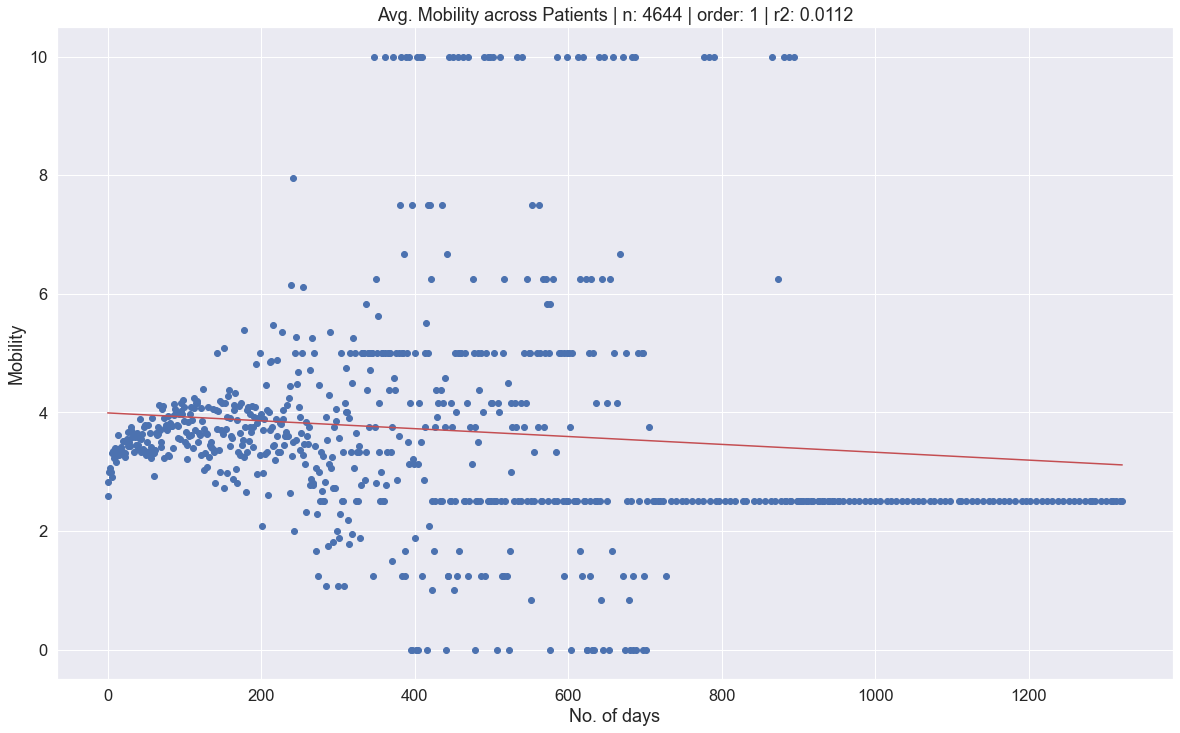

In [12]:
fig, ax = plt.subplots()
x = df_m1['hos_days']
y = df_m1['mobility']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
ax.scatter(x, y)
ax.plot(x, slope*x + intercept, color='r')
ax.set_title('Avg. Mobility across Patients | n: ' + str(len(df_ma.IDEHR.unique())) + ' | order: 1 | r2: ' + "{:.4f}".format(r_value ** 2))
ax.set_xlabel('No. of days')
ax.set_ylabel('Mobility')
plt.show()

In [13]:
# mobility regression plots with varying marker size
df_m1 = df_ma[['IDEHR', 'hos_days', 'mobility']].groupby(by=['hos_days']).agg(['mean', 'count']).reset_index()
df_m1

hos_days        IDEHR        mobility      
                     mean count      mean count
0          0  3807.627027  1480  2.589527  1480
1          1  5766.094617  2991  2.822635  2991
2          2  6076.568731  3019  2.989400  3019
3          3  6411.995305  3195  3.067293  3195
4          4  6184.781656  2922  2.988535  2922
..       ...          ...   ...       ...   ...
731     1308  6762.000000     1  2.500000     1
732     1310  6762.000000     1  2.500000     1
733     1314  6762.000000     1  2.500000     1
734     1319  6762.000000     1  2.500000     1
735     1322  6762.000000     1  2.500000     1

[736 rows x 5 columns]

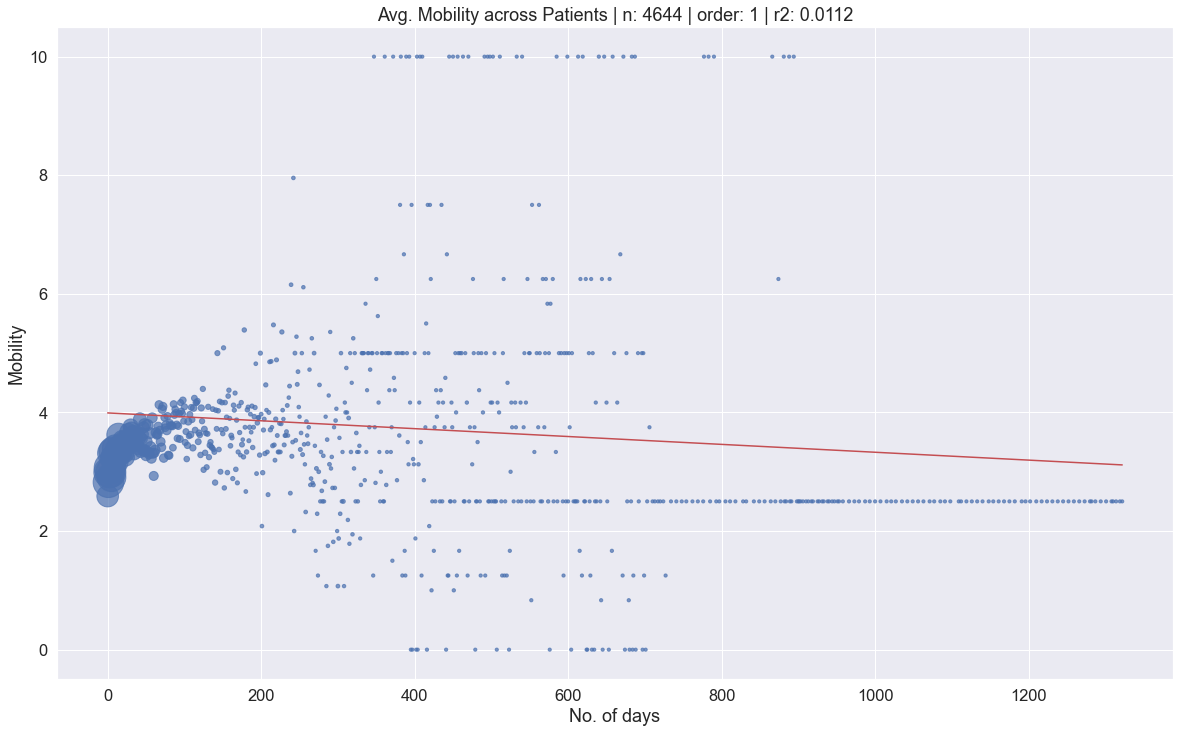

In [14]:
fig, ax = plt.subplots()
x = df_m1['hos_days']
y = df_m1['mobility']['mean']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
ax.scatter(x, y, s=get_scatter_marker_size(df_m1['IDEHR']['count']), alpha=0.7)
ax.plot(x, slope*x + intercept, color='r')
ax.set_title('Avg. Mobility across Patients | n: ' + str(len(df_ma.IDEHR.unique())) + ' | order: 1 | r2: ' + "{:.4f}".format(r_value ** 2))
ax.set_xlabel('No. of days')
ax.set_ylabel('Mobility')
plt.savefig('./graphs/mobility/avg_mob.png', bbox_inches='tight')
plt.show()

In [15]:
# mobility split by EHRType
df_m3 = df_ma[['hos_days', 'EHRType', 'mobility']].groupby(by=['EHRType', 'hos_days']).mean().reset_index()
df_m3

,EHRType,hos_days,mobility
0,AMB,0,4.283333
1,AMB,1,4.058266
2,AMB,2,4.238994
3,AMB,3,4.276316
4,AMB,4,3.937500
...,...,...,...
869,EHR,133,4.285714
870,EHR,134,3.750000
871,EHR,135,2.000000
872,EHR,136,5.000000


In [16]:
e_num = len(df_ma[df_ma['EHRType'] == 'EHR'].IDEHR.unique())
a_num = len(df_ma[df_ma['EHRType'] == 'AMB'].IDEHR.unique())
df_m3 = df_m3[df_m3['hos_days'] <= 200]

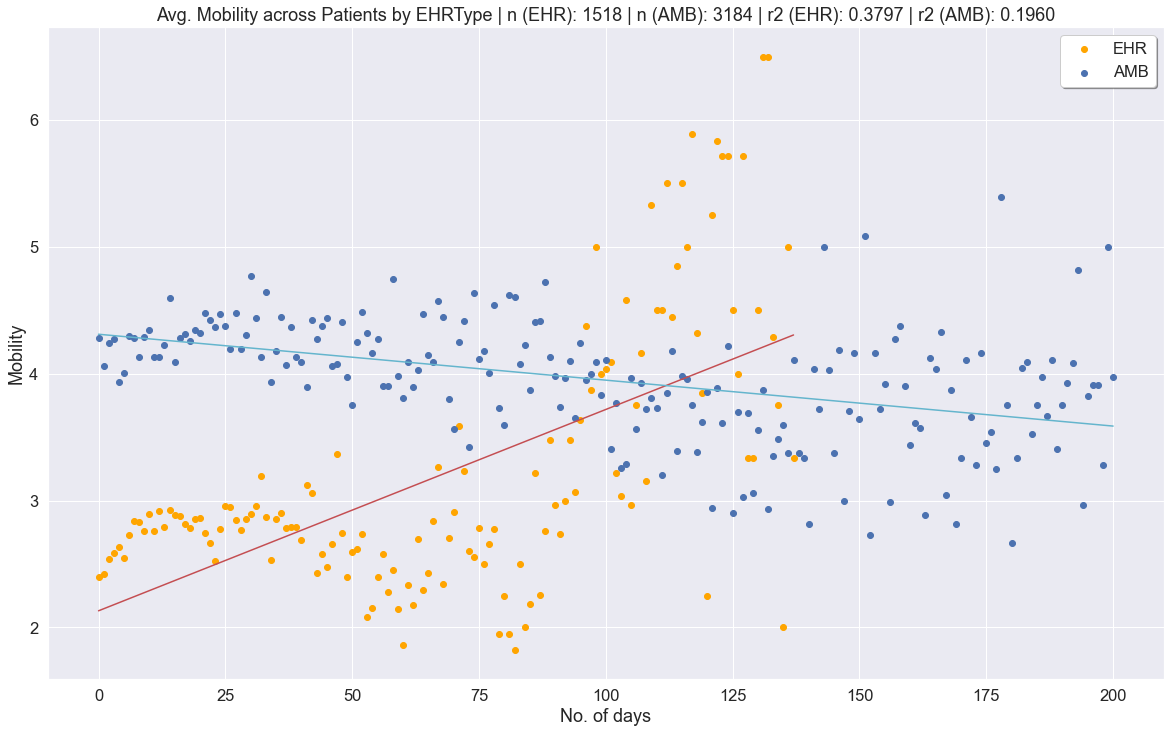

In [17]:
fig, ax = plt.subplots()
x_ehr = df_m3[df_m3['EHRType'] == 'EHR']['hos_days']
y_ehr = df_m3[df_m3['EHRType'] == 'EHR']['mobility']
slope, intercept, r_value_ehr, p_value, std_err = stats.linregress(x_ehr,y_ehr)
l1 = ax.scatter(x_ehr, y_ehr, color='orange')
ax.plot(x_ehr, slope*x_ehr + intercept, color='r')
x_amb = df_m3[df_m3['EHRType'] == 'AMB']['hos_days']
y_amb = df_m3[df_m3['EHRType'] == 'AMB']['mobility']
slope, intercept, r_value_amb, p_value, std_err = stats.linregress(x_amb,y_amb)
l2 = ax.scatter(x_amb, y_amb, color='b')
ax.plot(x_amb, slope*x_amb + intercept, color='c')
ax.legend((l1, l2), ('EHR', 'AMB'), loc='best', shadow=True, facecolor='w')
ax.set_xlabel('No. of days')
ax.set_ylabel('Mobility')
ax.set_title('Avg. Mobility across Patients by EHRType | n (EHR): ' + str(e_num) + ' | n (AMB): ' + str(a_num) + ' | r2 (EHR): ' + "{:.4f}".format(r_value_ehr ** 2) + " | r2 (AMB): " + "{:.4f}".format(r_value_amb ** 2))
plt.show()

In [18]:
# mobility split by EHRType
df_m3 = df_ma[['IDEHR', 'hos_days', 'EHRType', 'mobility']].groupby(by=['EHRType', 'hos_days']).agg(['mean', 'count']).reset_index()
df_m3

EHRType hos_days         IDEHR        mobility      
                              mean count      mean count
0       AMB        0  14464.546667   150  4.283333   150
1       AMB        1  14895.233062   738  4.058266   738
2       AMB        2  15192.991195   795  4.238994   795
3       AMB        3  15343.652412   912  4.276316   912
4       AMB        4  15038.077500   800  3.937500   800
..      ...      ...           ...   ...       ...   ...
869     EHR      133   2664.142857     7  4.285714     7
870     EHR      134   2597.500000     4  3.750000     4
871     EHR      135   2690.800000     5  2.000000     5
872     EHR      136   2131.000000     1  5.000000     1
873     EHR      137   2131.000000     3  3.333333     3

[874 rows x 6 columns]

In [19]:
e_num = len(df_ma[df_ma['EHRType'] == 'EHR'].IDEHR.unique())
a_num = len(df_ma[df_ma['EHRType'] == 'AMB'].IDEHR.unique())
df_m3 = df_m3[df_m3['hos_days'] <= 200]

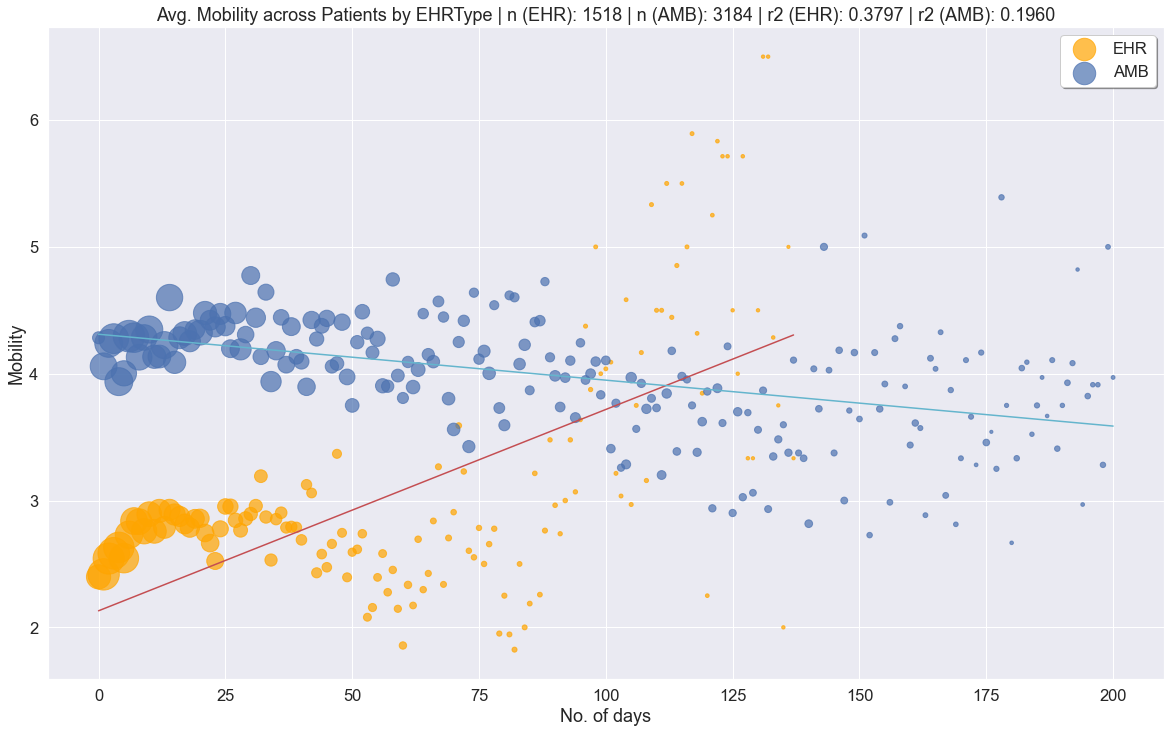

In [20]:
fig, ax = plt.subplots()
x_ehr = df_m3[df_m3['EHRType'] == 'EHR']['hos_days']
y_ehr = df_m3[df_m3['EHRType'] == 'EHR']['mobility']['mean']
slope, intercept, r_value_ehr, p_value, std_err = stats.linregress(x_ehr,y_ehr)
l1 = ax.scatter(x_ehr, y_ehr, color='orange', s=get_scatter_marker_size(df_m3[df_m3['EHRType'] == 'EHR']['IDEHR']['count']), alpha=0.7)
ax.plot(x_ehr, slope*x_ehr + intercept, color='r')
x_amb = df_m3[df_m3['EHRType'] == 'AMB']['hos_days']
y_amb = df_m3[df_m3['EHRType'] == 'AMB']['mobility']['mean']
slope, intercept, r_value_amb, p_value, std_err = stats.linregress(x_amb,y_amb)
l2 = ax.scatter(x_amb, y_amb, color='b', s=get_scatter_marker_size(df_m3[df_m3['EHRType'] == 'AMB']['IDEHR']['count']), alpha=0.7)
ax.plot(x_amb, slope*x_amb + intercept, color='c')
ax.legend((l1, l2), ('EHR', 'AMB'), loc='best', shadow=True, facecolor='w')
ax.set_xlabel('No. of days')
ax.set_ylabel('Mobility')
ax.set_title('Avg. Mobility across Patients by EHRType | n (EHR): ' + str(e_num) + ' | n (AMB): ' + str(a_num) + ' | r2 (EHR): ' + "{:.4f}".format(r_value_ehr ** 2) + " | r2 (AMB): " + "{:.4f}".format(r_value_amb ** 2))
plt.savefig('./graphs/mobility/mob_ehr.png', bbox_inches='tight')
plt.show()

In [21]:
# average mobility across Diagnosis
d_label = df_ma[df_ma['hos_days'] <= 100][['IDEHR', 'Diagnosis']].drop_duplicates()['Diagnosis'].value_counts()
df_m6 = df_ma[['Diagnosis', 'hos_days', 'mobility']].groupby(by=['Diagnosis', 'hos_days']).mean().reset_index()
df_m6 = df_m6[df_m6['hos_days'] <= 100]
df_m6['Diagnosis'] = df_m6['Diagnosis'].apply(lambda x: np.nan if isinstance(x, float) else x + ' (n: ' + str(d_label[x]) + ')')
p_num = d_label.sum()
df_m6 = df_m6.pivot(index='Diagnosis', columns='hos_days', values='mobility')
df_m6

hos_days,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
Diagnosis,,,,,,,,,,,,,,,,,,,,,
Brain-Snc (n: 199),2.072368,1.510067,1.615854,1.228324,1.250000,1.250000,1.347518,1.431159,1.412214,1.420455,...,2.500000,1.500000,0.357143,1.875000,4.166667,1.250000,5.500000,0.833333,3.125000,0.000000
Breast (n: 333),3.238095,2.946809,3.364486,3.679039,3.113636,2.881166,3.829545,3.519417,3.383234,3.973214,...,3.846154,2.812500,3.214286,2.976190,0.500000,4.285714,4.000000,2.500000,4.687500,2.916667
Cervical-Ovarian (n: 210),3.470149,3.740458,3.996212,4.028777,4.204545,3.996815,4.077181,4.475806,3.928571,4.228972,...,0.000000,6.071429,5.833333,3.750000,8.750000,6.666667,2.500000,7.500000,3.333333,1.666667
GI Tract (n: 730),3.012821,3.365826,3.141447,3.851351,3.579952,3.369018,3.753041,3.846154,3.818182,3.742857,...,4.090909,4.807692,4.375000,4.807692,5.250000,4.117647,7.058824,2.777778,5.909091,6.833333
Genitourinary (n: 261),2.797619,3.333333,3.087432,3.406736,3.361582,3.379310,3.264706,3.198052,2.965517,2.723881,...,4.722222,5.750000,6.428571,4.750000,3.571429,6.428571,3.653846,6.136364,6.071429,4.807692
Head-Neck (n: 98),2.934783,3.885135,3.940217,4.478022,4.929577,3.846154,4.139344,4.722222,4.087302,4.285714,...,3.333333,NaN,4.375000,5.000000,0.000000,NaN,4.375000,5.000000,NaN,6.250000
Liver-Biliary (n: 323),2.468354,2.921053,2.832447,2.982673,3.021978,3.609467,3.859649,3.735119,3.410714,3.371212,...,2.500000,4.000000,0.000000,6.250000,5.625000,3.750000,1.250000,7.083333,2.500000,0.000000
Lung (n: 921),2.696629,3.069853,3.606557,3.213675,2.981518,2.839168,3.276398,3.272727,3.241240,3.352601,...,4.642857,5.384615,3.684211,4.166667,4.230769,4.090909,4.868421,4.772727,5.000000,5.500000
Lymphoid_Leukemia (n: 20),0.000000,0.000000,1.500000,2.916667,2.500000,3.571429,4.090909,4.583333,3.928571,0.625000,...,NaN,5.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN


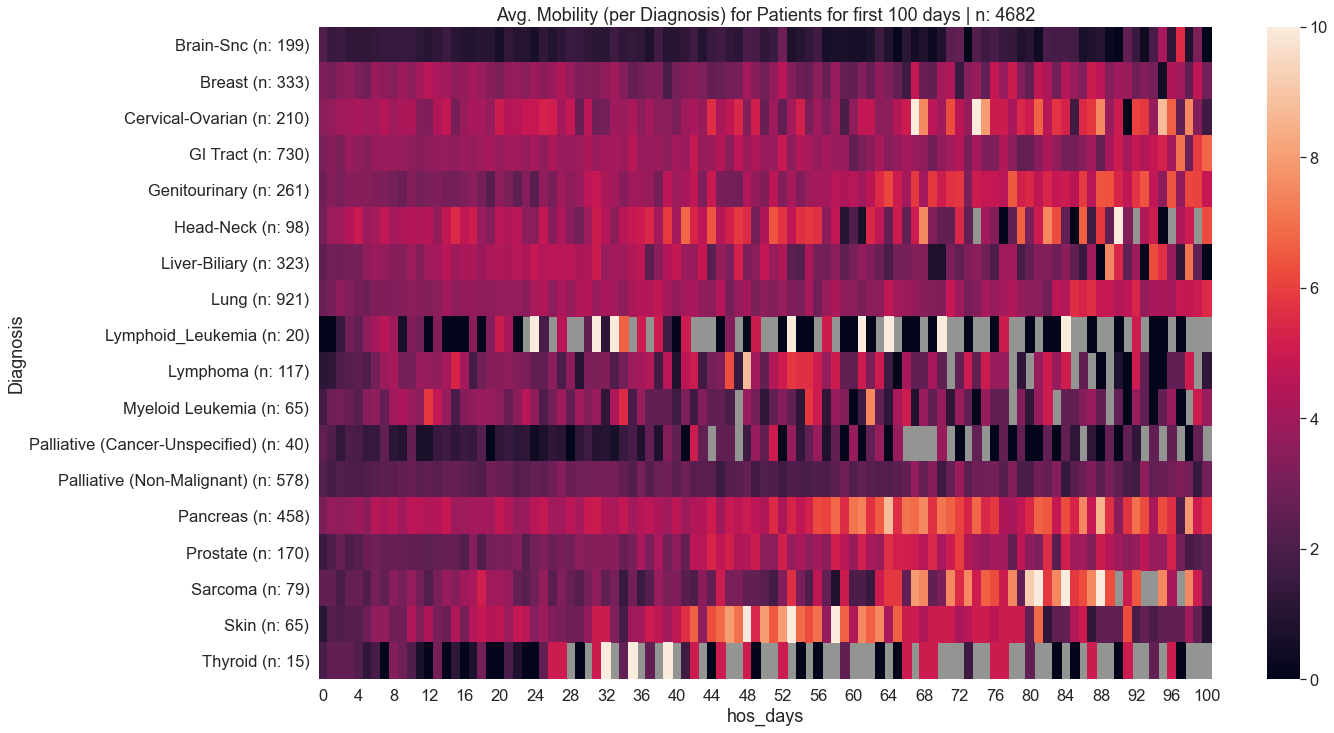

In [25]:
ax = plt.axes()
sns.heatmap(df_m6, annot=False, fmt='g', ax=ax, xticklabels=4)
ax.set_facecolor('xkcd:gray')
ax.set_title('Avg. Mobility (per Diagnosis) for Patients for first 100 days | n: ' + str(p_num))
plt.savefig('./graphs/mobility/mob_heatmap_100.png', bbox_inches='tight')
plt.show()